In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter('ignore')

import gc

from os import path
import sys
sys.path.append(path.abspath('..'))

In [3]:
import numpy as np
import cv2
from PIL import Image

from src.figures import FiguresAnalyzer

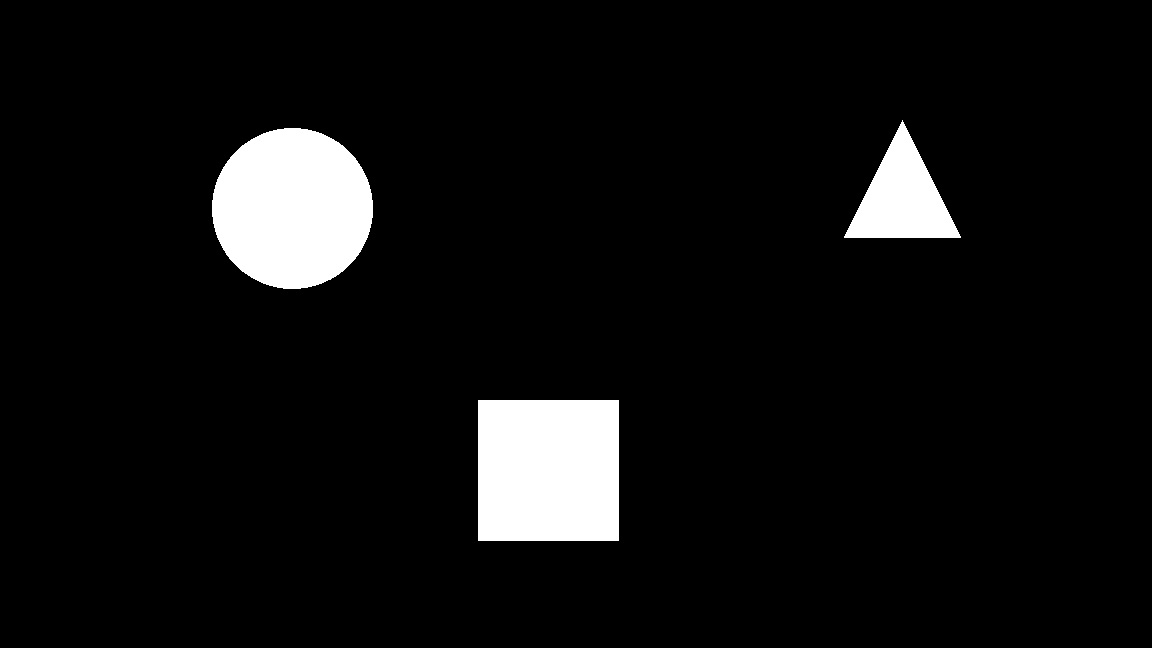

In [4]:
image = cv2.imread('../data/figures.png')
Image.fromarray(image)

In [5]:
analyzer = FiguresAnalyzer()

### Figure counting

In [6]:
analyzer.figure_counts(image)

(1, 1, 1)

### Figure filling

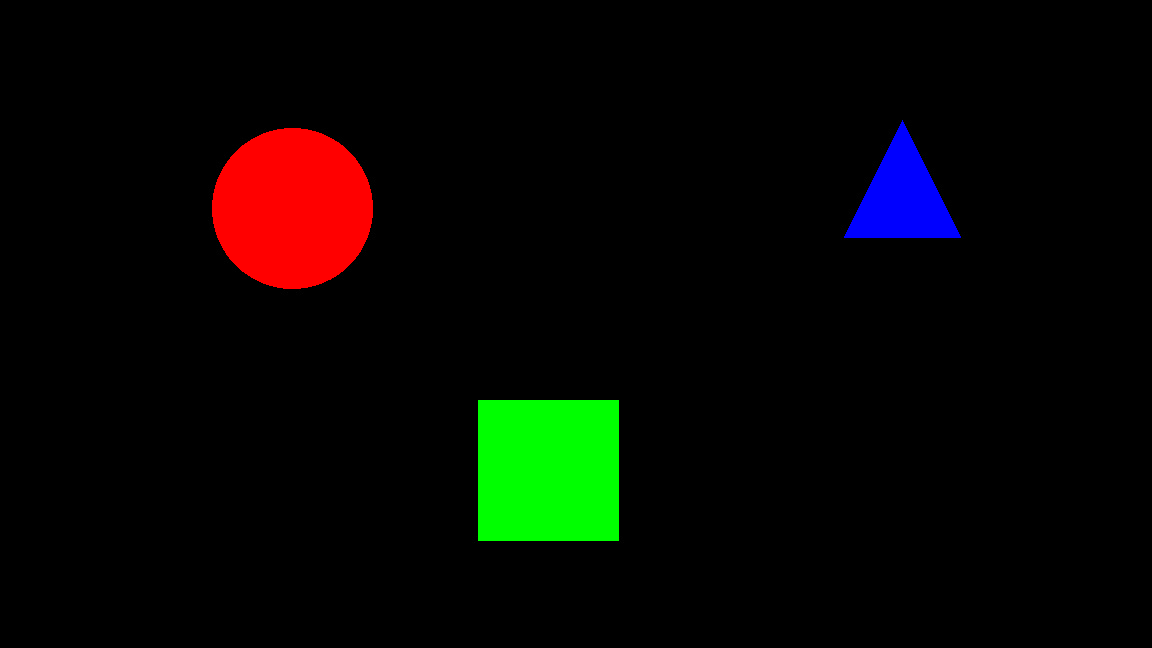

In [7]:
Image.fromarray(analyzer.fill_figures(image))

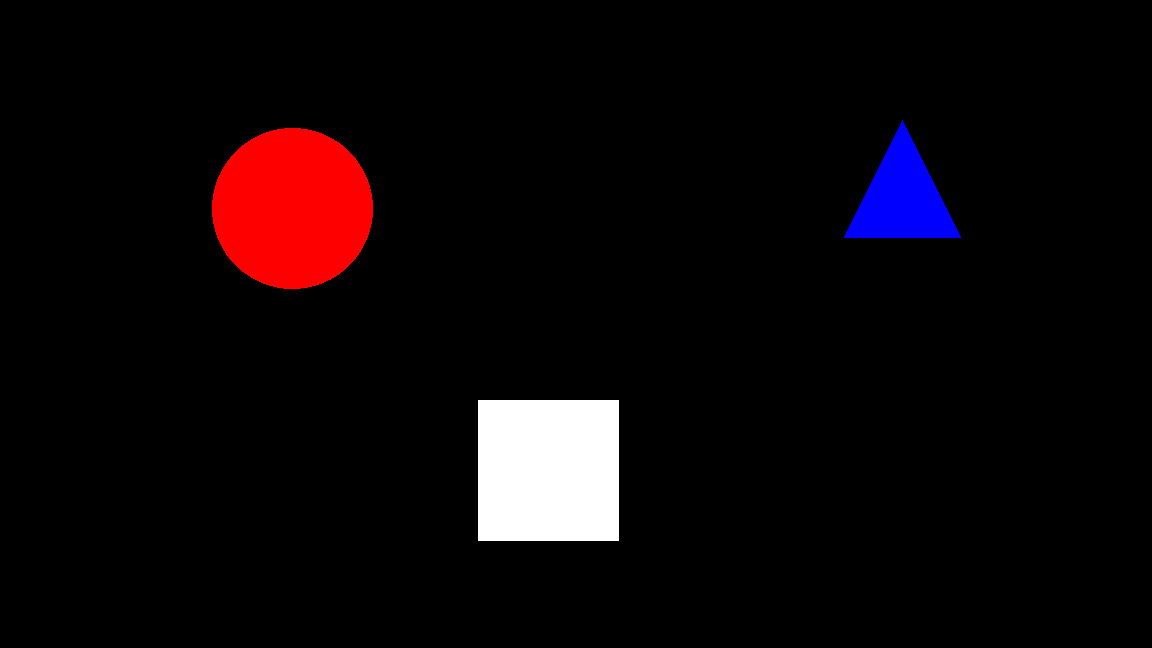

In [8]:
Image.fromarray(analyzer.fill_figures(image, figures=('circle', 'triangle')))

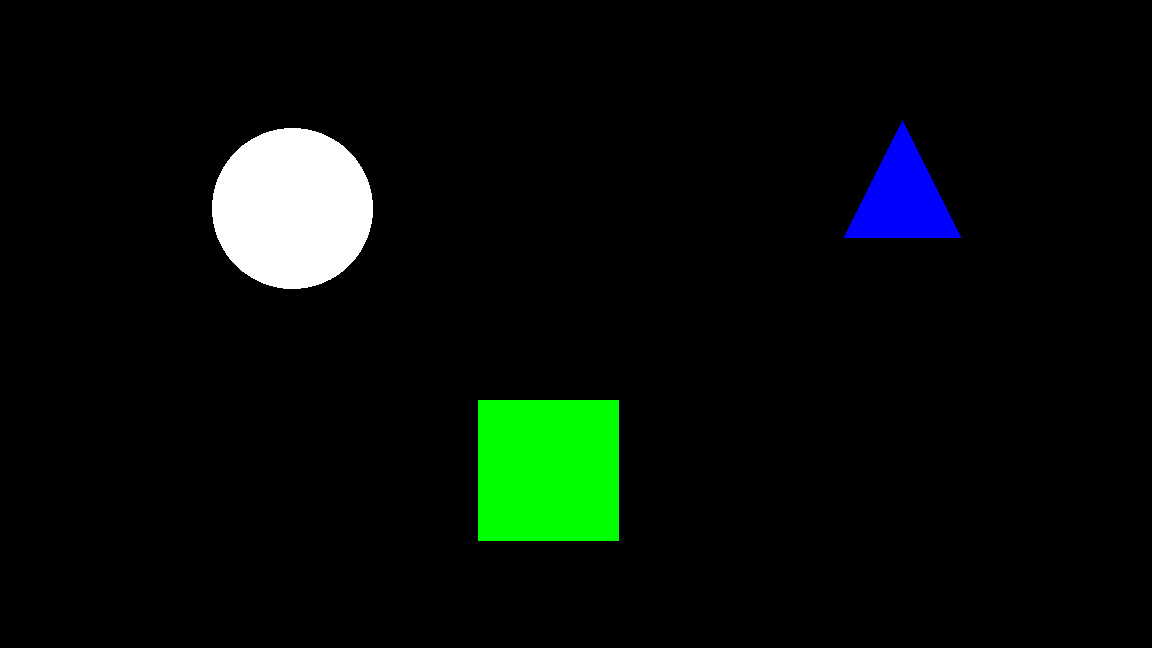

In [9]:
Image.fromarray(analyzer.fill_figures(image, figures=('rectangle', 'triangle')))

### Sanbox with synthetics

In [10]:
def plot_rectangle(image: np.ndarray) -> np.ndarray:
    image_shape = image.shape[:2]
    rectangle_size = np.random.randint(int(0.05 * min(image_shape)), int(0.30 * min(image_shape)))
    
    tl_y = np.random.randint(int(image.shape[0] * 0.01), int(image.shape[0] * 0.99) - rectangle_size)
    tl_x = np.random.randint(int(image.shape[1] * 0.01), int(image.shape[1] * 0.99) - rectangle_size)

    return cv2.rectangle(image,(tl_x,tl_y),(tl_x + rectangle_size, tl_y + rectangle_size), (255, ), -1)


def plot_circle(image: np.ndarray) -> np.ndarray:
    image_shape = image.shape[:2]
    radius = np.random.randint(int(0.05 * min(image_shape)), int(0.25 * min(image_shape)))
    center_y = np.random.randint(int(image.shape[0] * 0.01) + radius, int(image.shape[0] * 0.99) - radius)
    center_x = np.random.randint(int(image.shape[1] * 0.01) + radius, int(image.shape[1] * 0.99) - radius)
    
    return cv2.circle(image, (center_x, center_y), radius, (255,), -1)


def plot_triangle(image: np.ndarray) -> np.ndarray:
    image_shape = image.shape[:2]
    
    triangle_size = np.random.randint(int(0.1 * min(image_shape)), int(0.30 * min(image_shape)))
    
    shift_x = np.random.randint(
        int(image.shape[0] * 0.01) + triangle_size,
        int(image.shape[0] * 0.99) - triangle_size,
    )
    shift_y = np.random.randint(
        int(image.shape[0] * 0.01) + triangle_size,
        int(image.shape[0] * 0.99) - triangle_size,
    )
    
    points = np.array([
        np.array([0, 1, np.cos(np.pi/3)]) * triangle_size + shift_x,
        np.array([0, 0, -np.sin(np.pi/3)]) * triangle_size + shift_y,
    ]).T.reshape(-1, 1, 2).astype(np.int32)
    return cv2.fillPoly(image, pts=[points], color=(255, 255, 255))

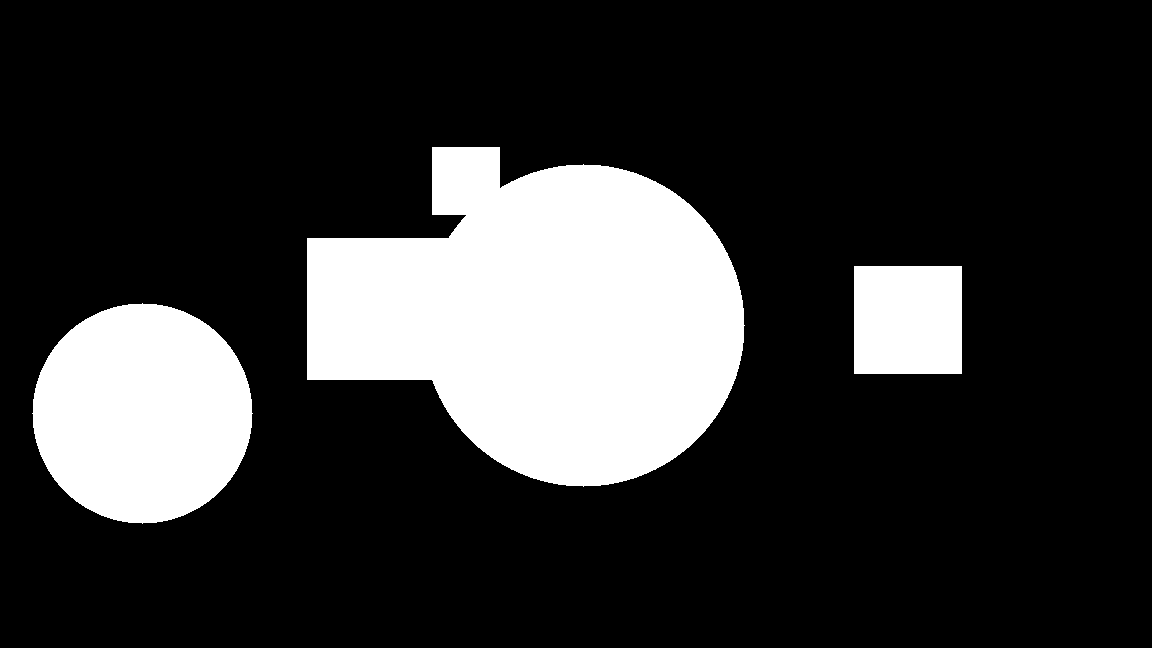

In [11]:
image = np.zeros((648, 1152), dtype=np.uint8)
for _ in range(np.random.randint(0, 5)):
    image = plot_rectangle(image)
    
for _ in range(np.random.randint(0, 5)):
    image = plot_circle(image)

for _ in range(np.random.randint(0, 5)):
    image = plot_triangle(image)
    
Image.fromarray(image)

In [12]:
circle, rectangle, triangle = analyzer.figure_counts(image)
print(f'Found circle={circle}, rectangle={rectangle}, triangle={triangle}')

Found circle=1, rectangle=1, triangle=0


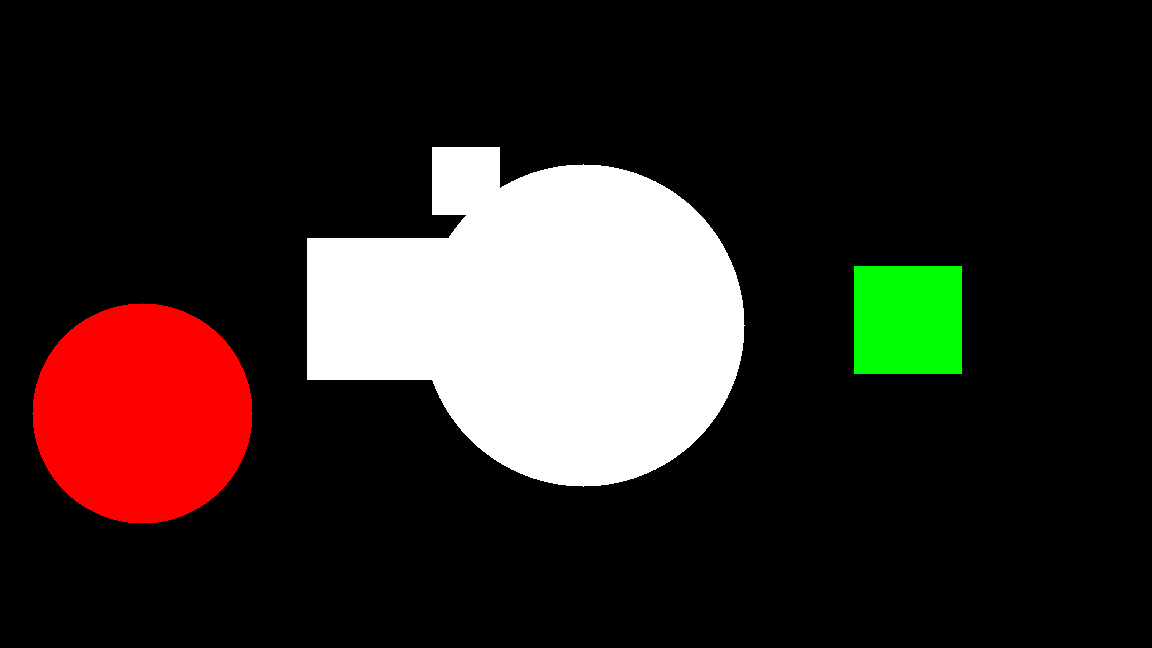

In [13]:
Image.fromarray(analyzer.fill_figures(image))